In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import re#
import string

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/fadhil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
json_path = '/home/fadhil/Desktop/ML/projects/news_classification/data/News.json'
df = pd.read_json(json_path,lines=True)

In [7]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [9]:
df.columns.tolist()

['link', 'headline', 'category', 'short_description', 'authors', 'date']

In [10]:
df = df[['headline','category']]

In [11]:
df

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS
...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS


In [12]:
df.isnull().sum()

headline    0
category    0
dtype: int64

#### no null value !!

In [13]:
df.shape

(209527, 2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   headline  209527 non-null  object
 1   category  209527 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [17]:
df['category'].value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

### Select top 10 categoris 

In [18]:
top_10_data = df['category'].value_counts().nlargest(10).index

In [19]:
top_10_data

Index(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK',
       'BUSINESS'],
      dtype='object', name='category')

In [20]:
# filter the data , to select only dataframe which held on those selected categories 
df_10 = df[df['category'].isin(top_10_data)].copy()
df_10.reset_index(drop=True,inplace=True)

In [21]:
df_10

,headline,category
0,The Funniest Tweets From Parents This Week (Se...,PARENTING
1,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT
2,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS
3,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS
4,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT
...,...,...
124782,Walmart Waving Goodbye To Some Greeters,BUSINESS
124783,"At World Economic Forum, Fear of Global Contag...",BUSINESS
124784,Positive Customer Experience: What's the Retur...,BUSINESS
124785,"Sundance, Ice-T, and Shades of the American Ra...",ENTERTAINMENT


In [22]:
file_path = '/home/fadhil/Desktop/ML/projects/news_classification/data/data.csv'
df_10.to_csv(file_path,index=False)

### Number of categories and its distribution 

In [25]:
top_categories = pd.DataFrame(df_10['category'].value_counts())
top_categories

,count
category,
POLITICS,35602
WELLNESS,17945
ENTERTAINMENT,17362
TRAVEL,9900
STYLE & BEAUTY,9814
PARENTING,8791
HEALTHY LIVING,6694
QUEER VOICES,6347
FOOD & DRINK,6340


/tmp/ipykernel_131738/173336847.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories,x=top_categories.index,y='count',palette='hls')


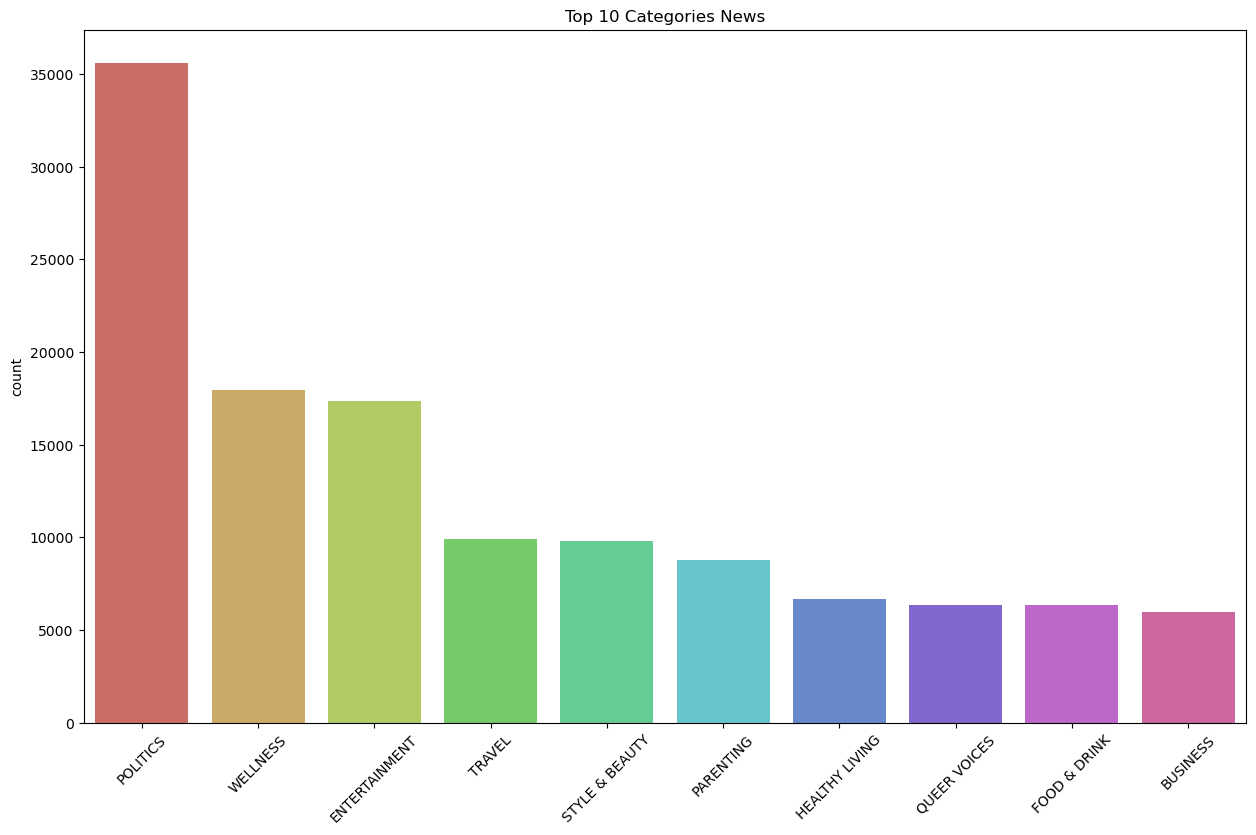

In [30]:
plt.rcParams['figure.figsize'] = (15,9)
sns.barplot(data=top_categories,x=top_categories.index,y='count',palette='hls')
plt.title('Top 10 Categories News')
plt.xticks(rotation = 45)
plt.xlabel('')
plt.show()

## Insight 
- most of the news are coming under politics

<Axes: xlabel='length', ylabel='Count'>

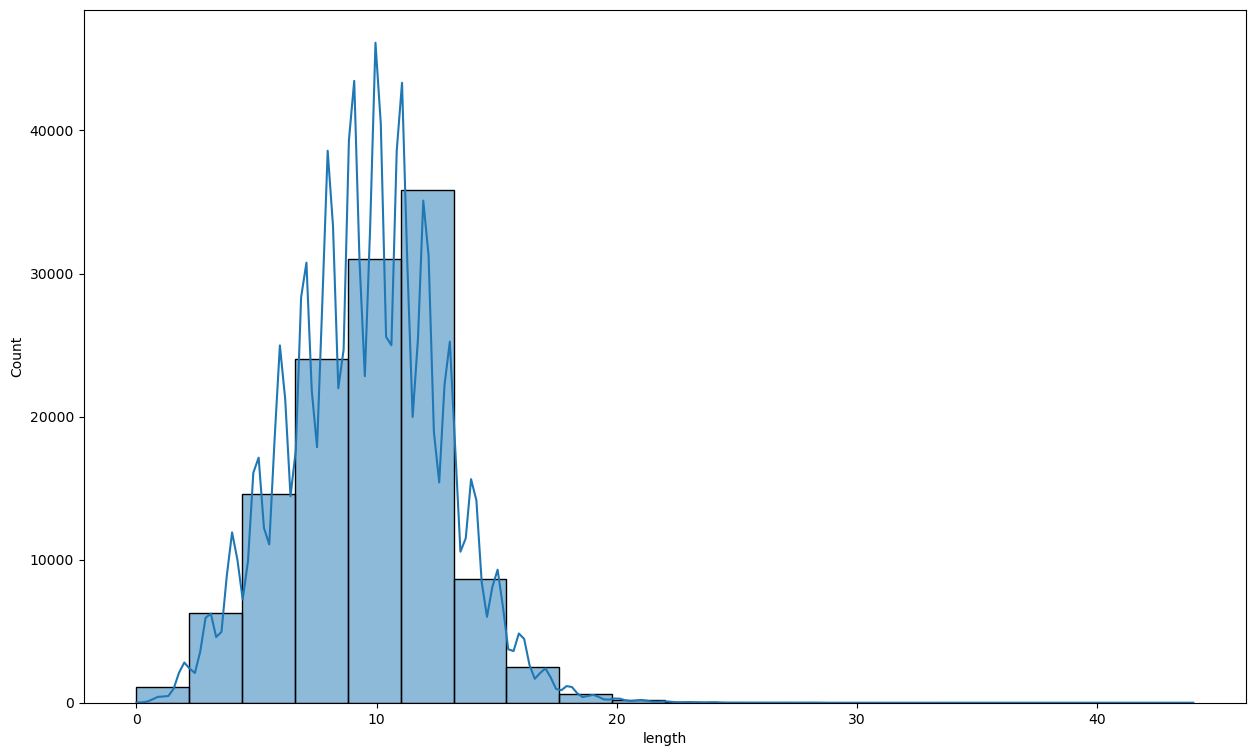

In [39]:
df_10['length'] = df_10['headline'].apply(lambda x: len(x.split()))
sns.histplot(df_10['length'],bins=20,kde=True)

## observe most common words which are used in sets of news

In [40]:
stop_words = set(stopwords.words('english'))

In [55]:
## cleaning the text 
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return ' '.join([word for word in text.split() if word not in stop_words])

In [ ]:
all_words = ' '.join(df_10['headline'].apply(clean_text))

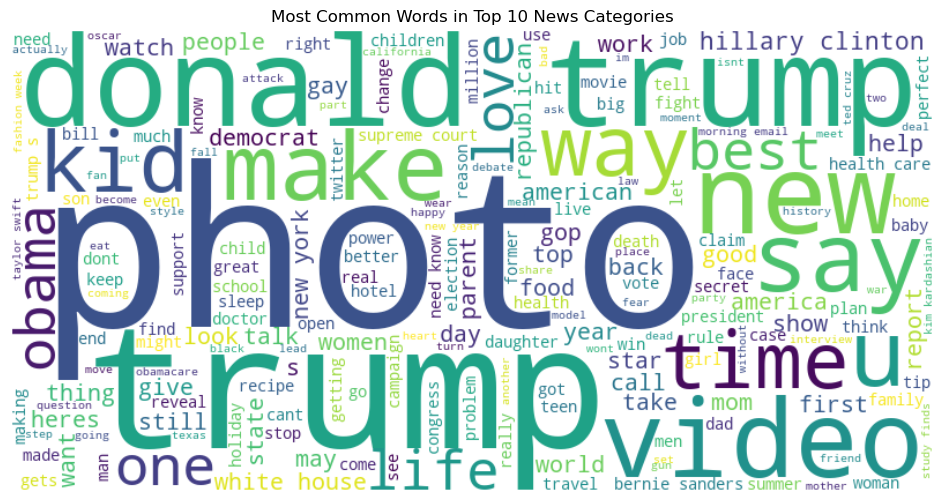

In [68]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Top 10 News Categories")
plt.show()